# House Prices Competition : Term Project 

#### Description:

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

### Importing Libraries:

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
print ("Train data shape:", train.shape)

Train data shape: (1460, 81)


In [7]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
print ("Test data shape:", test.shape)

Test data shape: (1459, 80)


### Data preparation methods:

#### Skewness of the data :

Skewness is a measure of the degree of asymmetry of a distribution. If the left tail (tail at small end of the distribution) is more pronounced than the right tail (tail at the large end of the distribution), the function is said to have negative skewness. If the reverse is true, it has positive skewness. If the two are equal, it has zero skewness.

Skew is: 1.88287575977


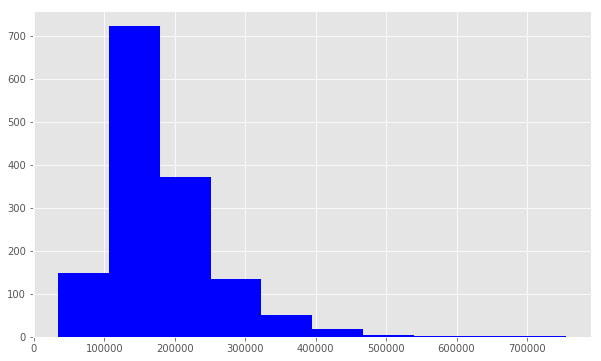

In [9]:
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

We apply log function to have zero skew 

Skew is: 0.121335062205


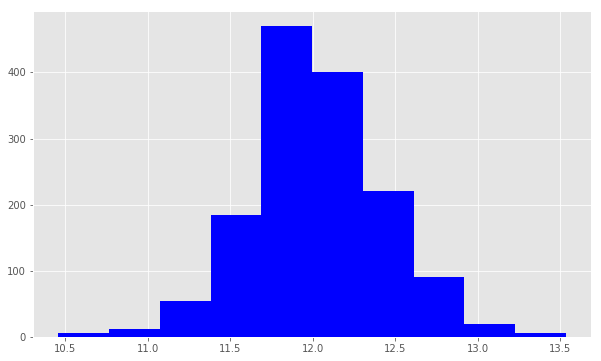

In [10]:
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

### Features engineering :

Same transformations should be applied on the training and testing data when doing features engineering.

#### Street feature:

In [11]:
print ("Original: \n") 
print (train.Street.value_counts(), "\n")

Original: 

Pave    1454
Grvl       6
Name: Street, dtype: int64 



In [12]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [13]:
print ('Encoded: \n') 
print (train.enc_street.value_counts())

Encoded: 

1    1454
0       6
Name: enc_street, dtype: int64


In [14]:
train.shape

(1460, 82)

#### SaleCondition feature:

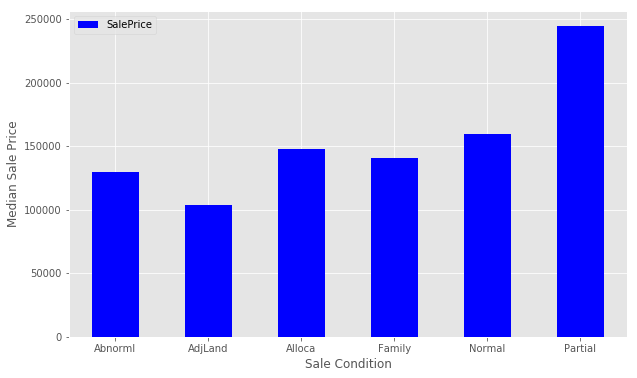

In [15]:
condition_pivot = train.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

we do the same for sale condition, we notice that partial has the highest median ( value of sale price which is the target value ) so we create another feature called enc_condition and we assign 1 to samples who have this value and 0 to others

In [16]:
# do the same with other features

In [17]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

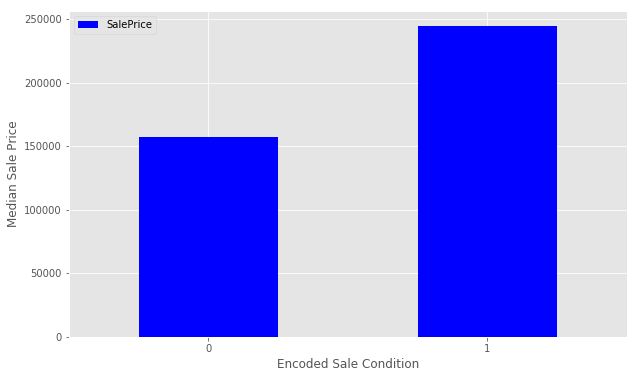

In [18]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [19]:
train.shape

(1460, 83)

In [20]:
#### GarageCars

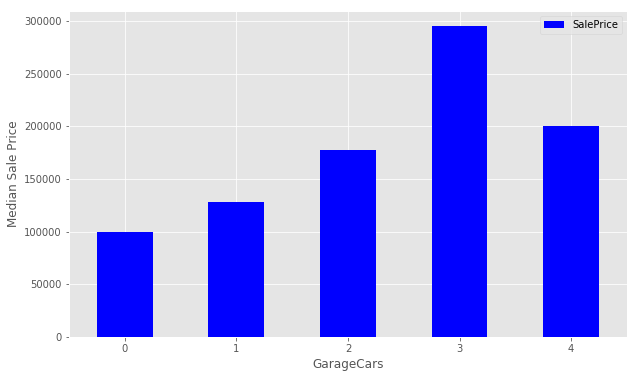

In [21]:
garage_pivot = train.pivot_table(index='GarageCars',
                                  values='SalePrice', aggfunc=np.median)

garage_pivot.plot(kind='bar', color='blue')
plt.xlabel('GarageCars')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [22]:
def encode(x): return 1 if x == 3 else 0
train['enc_garageCars'] = train.GarageCars.apply(encode)
test['enc_garageCars'] = test.GarageCars.apply(encode)

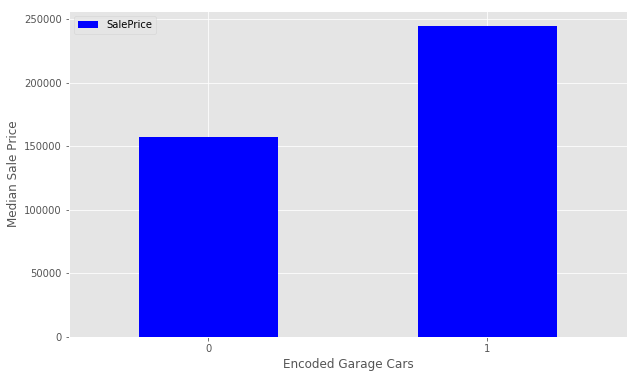

In [23]:
garageCars_pivot = train.pivot_table(index='enc_garageCars', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Garage Cars')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

#### GarageArea feature:

GarageArea: Size of garage in square feet


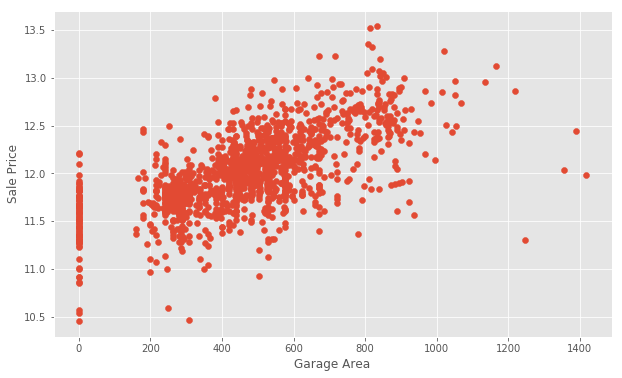

In [24]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [25]:
train = train[train['GarageArea'] < 1200]
#test = test[test['GarageArea'] < 1200]

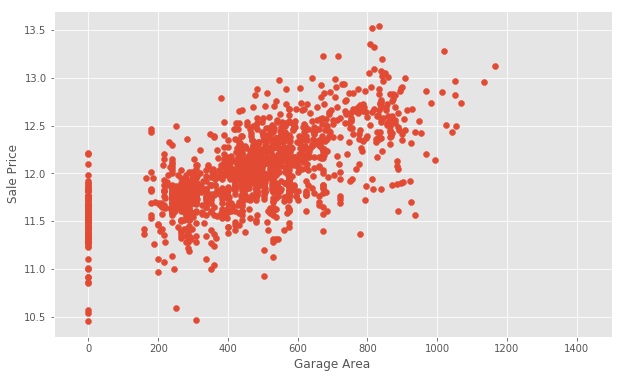

In [26]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-100,1500) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

#### GrLivArea feature:

GrLivArea: Above grade (ground) living area square feet

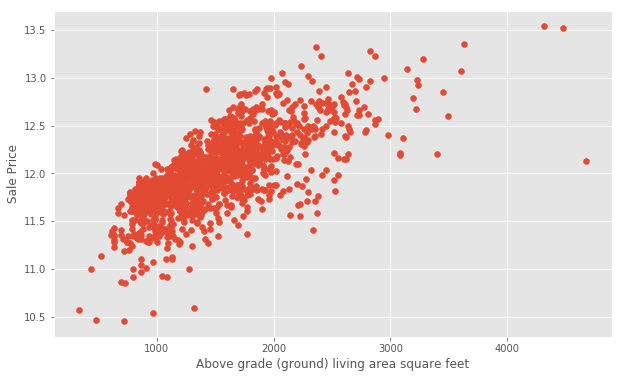

In [27]:
plt.scatter(x=train['GrLivArea'], y=np.log(train.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

In [28]:
train = train[train['GrLivArea'] < 4000]

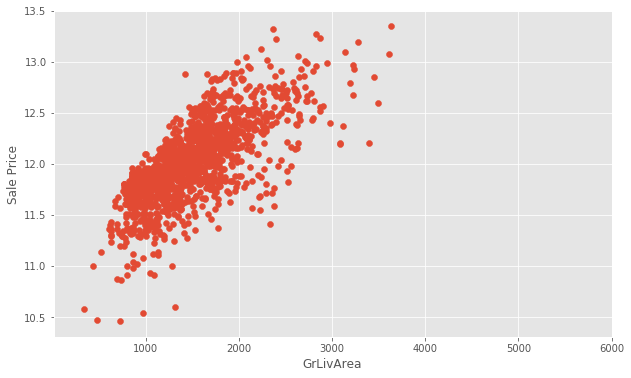

In [29]:
plt.scatter(x=train['GrLivArea'], y=np.log(train.SalePrice))
plt.xlim(10,6000) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('GrLivArea')
plt.show()

#### GarageCars:

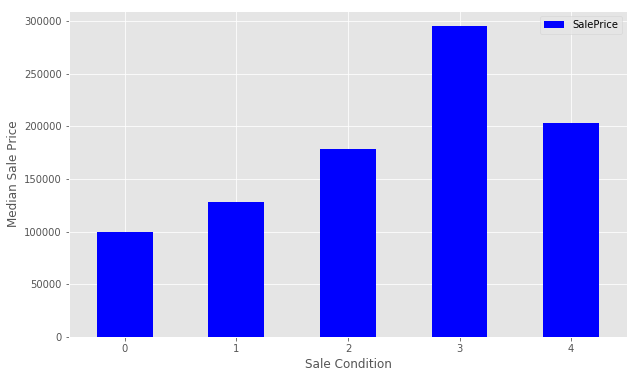

In [30]:
garage_cars_pivot = train.pivot_table(index='GarageCars',
                                    values='SalePrice', aggfunc=np.median)
garage_cars_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [31]:
def encode(x): return 1 if x == 3 else 0
train['enc_garageCars'] = train.GarageCars.apply(encode)
test['enc_garageCars'] = test.GarageCars.apply(encode)

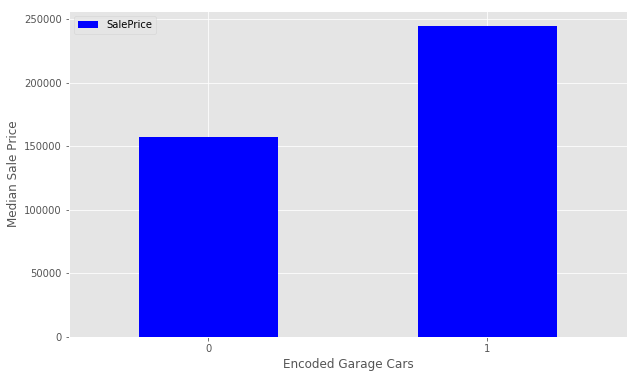

In [32]:
garageCars_pivot = train.pivot_table(index='enc_garageCars', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Garage Cars')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [33]:
train.shape

(1452, 84)

#### MasVnrArea

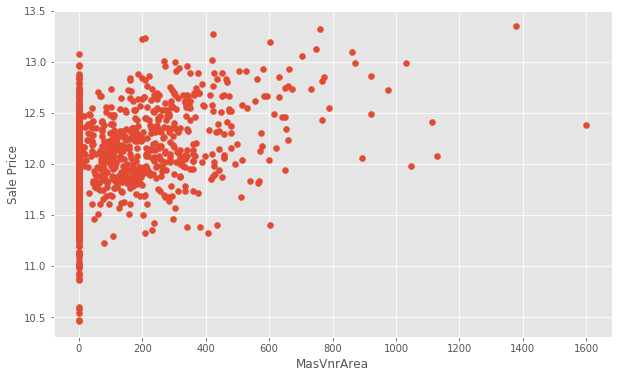

In [34]:
plt.scatter(x=train['MasVnrArea'], y=np.log(train.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('MasVnrArea')
plt.show()

In [35]:
train = train[train['MasVnrArea'] < 1200]

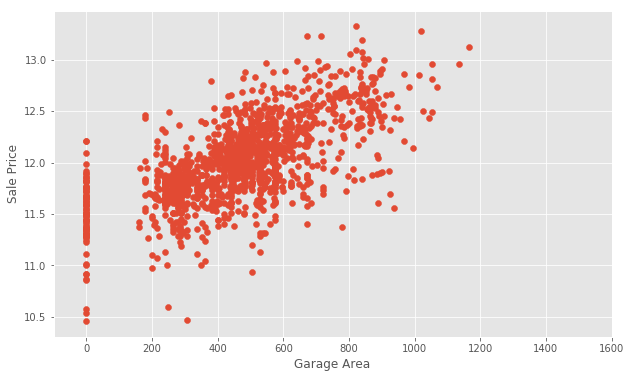

In [36]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-100,1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [37]:
#making a copy of data with only numericl values
train_set = train.select_dtypes(include=[np.number])
test_set = test.select_dtypes(include=[np.number])

### Methods to handle Null values :

In [38]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
#nulls

#### Interpolation

we fill the missing values with an average value.

In [39]:
data_train_interpolated = train.select_dtypes(include=[np.number]).interpolate()
sum(data_train_interpolated.isnull().sum() != 0)
#data_train_interpolated.shape

0

In [40]:
data_test_interpolated = test.select_dtypes(include=[np.number]).interpolate()
sum(data_test_interpolated.isnull().sum() != 0)

0

#### Imputing:  
to replace the null value with : 

* A constant value that has meaning within the domain, such as 0, distinct from all other values.
* A value from another randomly selected record.
* A mean, median or mode value for the column.
* A value estimated by another predictive model.

In [41]:
from sklearn.preprocessing import Imputer
my_imputer = Imputer()
train_set = train_set.drop(['SalePrice', 'Id'], axis=1)

train_with_imputed_values = my_imputer.fit_transform(train_set)
test_with_imputed_values = my_imputer.fit_transform(test_set)

We can also fill with zero :

In [42]:
data_with_zeros_train = train_set.fillna(0)
data_with_zeros_test = test_set.fillna(0)

We can drop them,but it's not a recomanded method, because there is a possibility that the test set will have missing values in places where the training data did not, this will result in an error.

## Building the model:

### Linear Regression:

We can use with it Ridge Regularization: a process which shrinks the regression coefficients of less important features.http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
* loop diffrent values of alpha
* add more features


In [43]:
# apply log again (because we used skew before)
y = np.log(train.SalePrice)
X = data_train_interpolated.drop(['SalePrice', 'Id'], axis=1)

train_test_split() returns four objects:

* X_train is the subset of our features used for training.
* X_test is the subset which will be our 'hold-out' set - what we'll use to test the model.
* y_train is the target variable SalePrice which corresponds to X_train.
* y_test is the target variable SalePrice which corresponds to X_test. 

random_state=42 allow reproducible results.

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                   X, y, random_state=42, test_size=.33)


### Using other Algorithms:

In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
import lightgbm as lgb

In [46]:
# Lasso regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
lasso.fit(X_train, y_train)
print ("R^2 is: \n", lasso.score(X_test, y_test))

R^2 is: 
 0.901029021979


In [47]:
# Elastic Net regression
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
ENet.fit(X_train, y_train)
print ("R^2 is: \n", ENet.score(X_test, y_test))

R^2 is: 
 0.900909154662


In [48]:
# Gradient boosting regression
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

GBoost.fit(X_train, y_train)
print ("R^2 is: \n", GBoost.score(X_test, y_test))

R^2 is: 
 0.900751085704


In [49]:
# LightGBM
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

model_lgb.fit(X_train, y_train)
print ("R^2 is: \n", model_lgb.score(X_test, y_test))

R^2 is: 
 0.902368677607


#### Averging Models:

In [50]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone


class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [51]:
averaged_models = AveragingModels(models = (ENet, GBoost, model_lgb, lasso))

averaged_models.fit(X_train, y_train)
print ("R^2 is: \n", averaged_models.score(X_test, y_test))

R^2 is: 
 0.911454188475


### Making a submission

In [52]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [53]:
feats = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

In [54]:
predictions = averaged_models.predict(feats)
final_predictions = np.exp(predictions)

In [55]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,123425.926976
1,1462,134057.995729
2,1463,180096.330871
3,1464,191370.477152
4,1465,183623.695818


In [56]:
submission.shape

(1459, 2)

In [57]:
submission.to_csv('submission_averged_models.csv', index=False)